## Turbine components sizing

In [1]:
from windisch import *
import numpy as np
import xarray as xr
import pandas as pd

In [4]:
update_input_parameters()
tip = TurbinesInputParameters()
tip.static()
_, array = fill_xarray_from_input_parameters(
    tip,
    #scope={"year": [2020, ],}
)
array = array.interp(size=np.linspace(100, 16000, 10), kwargs={"fill_value": "extrapolate"},)
fp = "extra data/era5_mean_2013-2022_month_by_hour_corrected.nc"
wt = WindTurbineModel(
    array,
    #location=(55.602164360115104, 12.491974627997108),
    wind_data=xr.open_dataset(fp),
    country="DK"
)
wt.set_all()

/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_64033/506349104.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


Text(0.5, 1.0, 'Rated power vs. Rotor diameter')

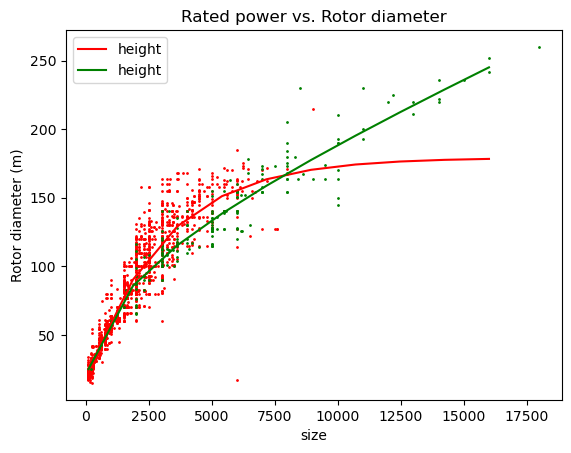

In [7]:
fp = "extra data/Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data.dropna(subset="Rotor diameter", inplace=True)

ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rated power", y="Rotor diameter", s=1, c='r')
wt.array.sel(
    parameter="rotor diameter",
    application="onshore",
    year=2020,
    value=0
).to_dataframe("height").reset_index().plot(
    kind='line', x='size', y='height', ax=ax, color="r"
)

ax = data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rated power", y="Rotor diameter", s=1, c='g', ax=ax)
wt.array.sel(
    parameter="rotor diameter",
    application="offshore",
    year=2020,
    value=0
).to_dataframe("height").reset_index().plot(
    kind='line', x='size', y='height', ax=ax, color="g"
)
ax.set_ylabel("Rotor diameter (m)")
ax.set_title("Rated power vs. Rotor diameter")

/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_64033/2134749958.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


Text(0.5, 1.0, 'Rotor diameter vs. Hub height')

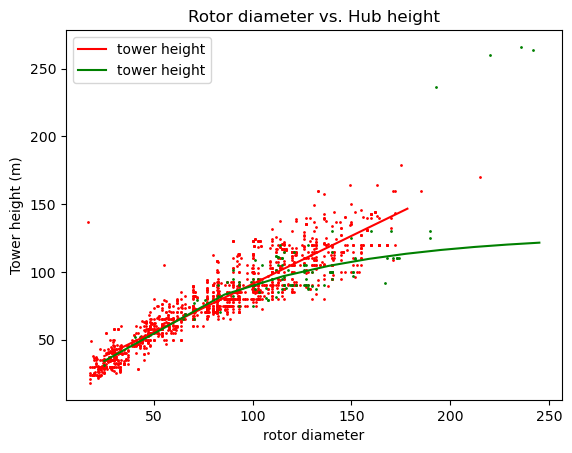

In [8]:
fp = "extra data/Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data.dropna(
    subset=["Minimum hub height", "Maximum hub height"],
    how="all",
    inplace=True
)
data["hub height"] = data[["Minimum hub height", "Maximum hub height"]].mean(axis=1)

ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rotor diameter", y="hub height", s=1, c='r')
wt.array.sel(
    parameter=["tower height", "rotor diameter"],
    application="onshore",
    year=2020,
    value=0
).to_dataframe("height").unstack()["height"].reset_index().plot(
    kind='line', x='rotor diameter', y='tower height', ax=ax, color="r"
)
data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rotor diameter", y="hub height", s=1, c='g', ax=ax)
wt.array.sel(
    parameter=["tower height", "rotor diameter"],
    application="offshore",
    year=2020,
    value=0
).to_dataframe("height").unstack()["height"].reset_index().plot(
    kind='line', x='rotor diameter', y='tower height', ax=ax, color="g"
)
ax.set_ylabel("Tower height (m)")
ax.set_title("Rotor diameter vs. Hub height")

/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_64033/856629500.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


Text(0.5, 1.0, 'Rated power vs. Nacelle mass')

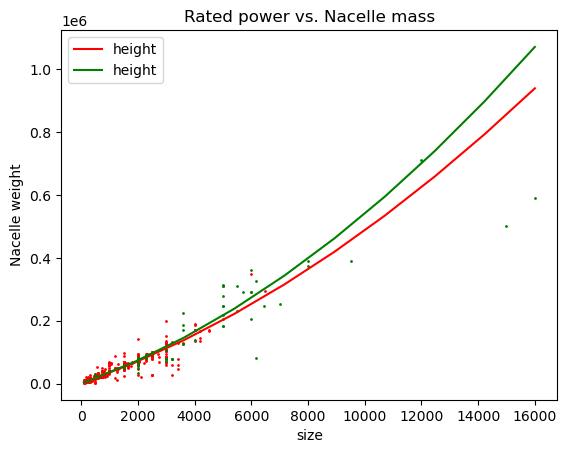

In [9]:
fp = "extra data/Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data.dropna(subset="Nacelle weight", inplace=True)
data["Nacelle weight"] *= 1000


ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rated power", y="Nacelle weight", s=1, c='r')
wt.array.sel(
    parameter="nacelle mass",
    application="onshore",
    year=2020,
    value=0
).to_dataframe("height").reset_index().plot(
    kind='line', x='size', y='height', ax=ax, color="r"
)

ax = data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rated power", y="Nacelle weight", s=1, c='g', ax=ax)
wt.array.sel(
    parameter="nacelle mass",
    application="offshore",
    year=2020,
    value=0
).to_dataframe("height").reset_index().plot(
    kind='line', x='size', y='height', ax=ax, color="g"
)
ax.set_title("Rated power vs. Nacelle mass")

/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_64033/905652564.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


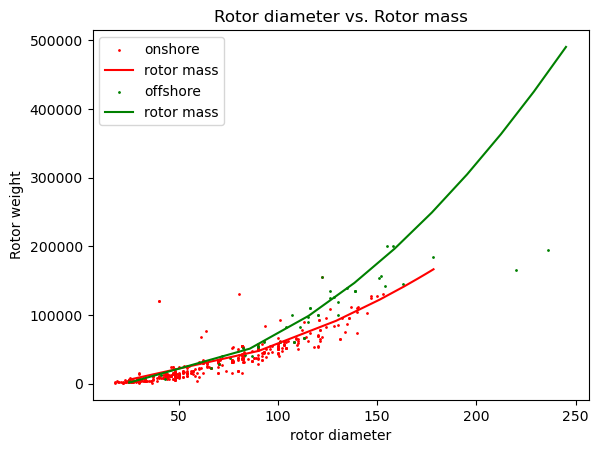

In [10]:
fp = "extra data/Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data.dropna(subset="Rotor weight", inplace=True)
data["Rotor weight"] *= 1000

ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rotor diameter", y="Rotor weight", s=1, c='r', label="onshore")
wt.array.sel(
    parameter=["rotor diameter", "rotor mass"],
    application="onshore",
    year=2020,
    value=0
).to_dataframe("onshore").reset_index().pivot(
    index=["size", "application", "year", "value"], columns="parameter", values="onshore"
).reset_index().plot(
    kind='line', x='rotor diameter', y='rotor mass', ax=ax, color="r"
)

data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rotor diameter", y="Rotor weight", s=1, c='g', ax=ax, label="offshore")
wt.array.sel(
    parameter=["rotor diameter", "rotor mass"],
    application="offshore",
    year=2020,
    value=0
).to_dataframe("offshore").reset_index().pivot(
    index=["size", "application", "year", "value"], columns="parameter", values="offshore"
).reset_index().plot(
    kind='line', x='rotor diameter', y='rotor mass', ax=ax, color="g"
)
ax.set_title("Rotor diameter vs. Rotor mass")
ax.legend()

/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_64033/1683234560.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


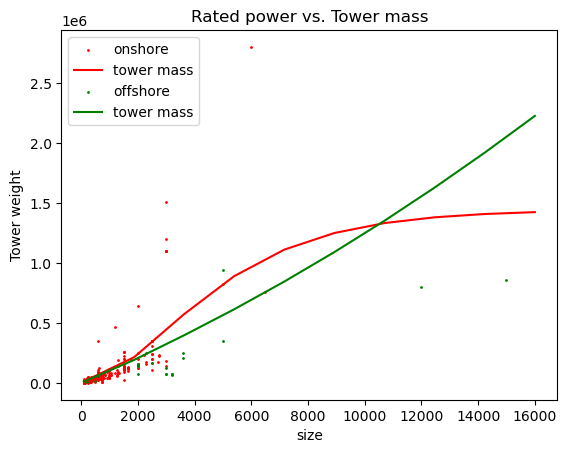

In [11]:
fp = "extra data/Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data['Tower weight'] = pd.to_numeric(data['Tower weight'], errors='coerce')
data.dropna(subset="Tower weight", inplace=True)
data["Tower weight"] *= 1000

ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rated power", y="Tower weight", s=1, c='r', label="onshore")
wt.array.sel(
    parameter="tower mass",
    application="onshore",
    year=2020,
    value=0
).to_dataframe("onshore").reset_index().pivot(
    index=["size", "application", "year", "value"], columns="parameter", values="onshore"
).reset_index().plot(
    kind='line', x='size', y='tower mass', ax=ax, color="r"
)

data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rated power", y="Tower weight", s=1, c='g', ax=ax, label="offshore")
wt.array.sel(
    parameter="tower mass",
    application="offshore",
    year=2020,
    value=0
).to_dataframe("offshore").reset_index().pivot(
    index=["size", "application", "year", "value"], columns="parameter", values="offshore"
).reset_index().plot(
    kind='line', x='size', y='tower mass', ax=ax, color="g"
)
ax.set_title("Rated power vs. Tower mass")
ax.legend()

/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_64033/3136488294.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


Text(0.5, 1.0, 'Total mass vs. Rated power')

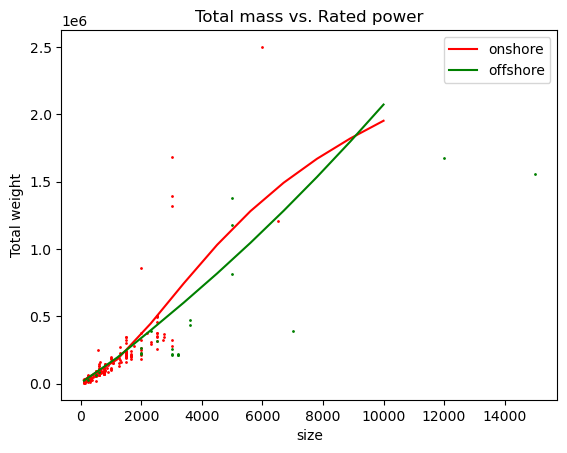

In [15]:
import numpy as np
fp = "extra data/Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data['Total weight'] = pd.to_numeric(data['Total weight'], errors='coerce')
data.dropna(subset="Total weight", inplace=True)
data["Total weight"] *= 1000

mass_params = [
    #'cable mass',
    #'concrete in foundation mass',
    #'electronics mass',
    #'foundation mass',
    'nacelle mass',
    #'pile mass',
    #'reinforcing steel in foundation mass',
    'rotor mass',
    'tower mass',
    #'transition mass'
]

ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rated power", y="Total weight", s=1, c='r')
wt.array.sel(
    parameter=mass_params,
    application="onshore",
    year=2020,
    value=0
).sum(dim="parameter").to_dataframe("onshore").reset_index().plot(x="size", y="onshore",  c="r", ax=ax)

data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rated power", y="Total weight", s=1, c='g', ax=ax)
wt.array.sel(
    parameter=mass_params,
    application="offshore",
    year=2020,
    value=0
).sum(dim="parameter").to_dataframe("offshore").reset_index().plot(x="size", y="offshore", c="g", ax=ax)
ax.set_title("Total mass vs. Rated power")

In [12]:
from windisch import *
import numpy as np
import xarray as xr
import pandas as pd

tip = TurbinesInputParameters()
tip.static()
_, array = fill_xarray_from_input_parameters(
    tip,
    scope={"year": [2020, ],}
)
array = array.interp(size=np.linspace(100, 10000, 10), kwargs={"fill_value": "extrapolate"},)
fp = "extra data/era5_mean_2013-2022_month_by_hour_corrected.nc"
wt = WindTurbineModel(
    array,
    #location=(55.602164360115104, 12.491974627997108),
    wind_data=xr.open_dataset(fp),
    country="DK"
)
wt.set_all()

mass_params = [
    'cable mass',
    #'concrete in foundation mass',
    'electronics mass',
    'foundation mass',
    'nacelle mass',
    #'pile mass',
    #'reinforcing steel in foundation mass',
    'rotor mass',
    'tower mass',
    #'transition mass'
]

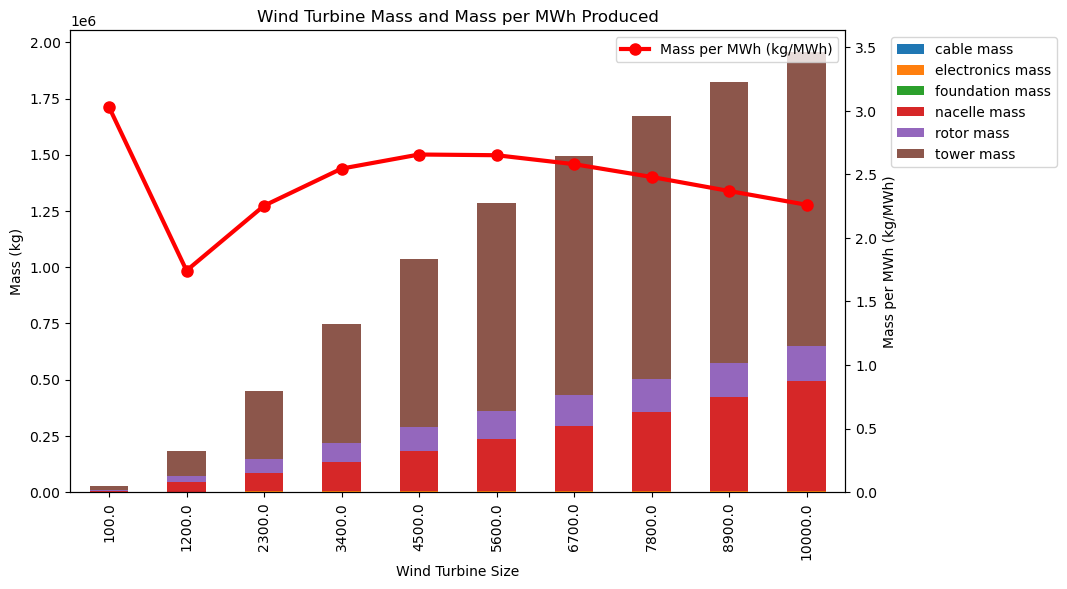

In [13]:
import matplotlib.pyplot as plt

mass_df = wt.array.sel(
    parameter=mass_params,
    value=0,
    year=2020,
    application="onshore"
).to_dataframe("x").unstack()["x"]
total_mass_kg = mass_df.sum(axis=1)  # Total mass in kg

# Extract electricity production data
electricity_production = wt.array.sel(
    parameter="lifetime electricity production",
    year=2020,
    application="onshore",
    value=0
).to_dataframe("x")["x"]
valid_idx = (electricity_production > 0) & (~electricity_production.isna())
mass_per_mwh = (total_mass_kg * 1_000) / electricity_production  # Convert kg to grams, then divide by MWh

# Ensure indices are explicitly aligned
mass_per_mwh = mass_per_mwh.reindex(mass_df.loc[valid_idx].index)

# Create a figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mass parameters as a stacked bar chart
mass_df.loc[valid_idx].plot(kind="bar", stacked=True, ax=ax1, legend=False)

# Set labels for the primary axis
ax1.set_ylabel("Mass (kg)")
ax1.set_xlabel("Wind Turbine Size")
ax1.set_title("Wind Turbine Mass and Mass per MWh Produced")

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot mass per MWh as a line (use mass_per_mwh.index for x-values)
ax2.plot(
    ax1.get_xticks(),  # Properly aligned index
    mass_per_mwh.values,
    color="red",
    marker="o",
    markersize=8,
    linestyle="-",
    linewidth=3,
    label="Mass per MWh (kg/MWh)",
    zorder=5
)

# Set labels for the secondary axis
ax2.set_ylabel("Mass per MWh (kg/MWh)")

# Ensure visibility of secondary axis
ax2.set_ylim(0, mass_per_mwh.max() * 1.2)

# Add legends
ax1.legend(mass_df.columns, loc="upper left", bbox_to_anchor=(1.05, 1))
ax2.legend(loc="upper right")

plt.show()


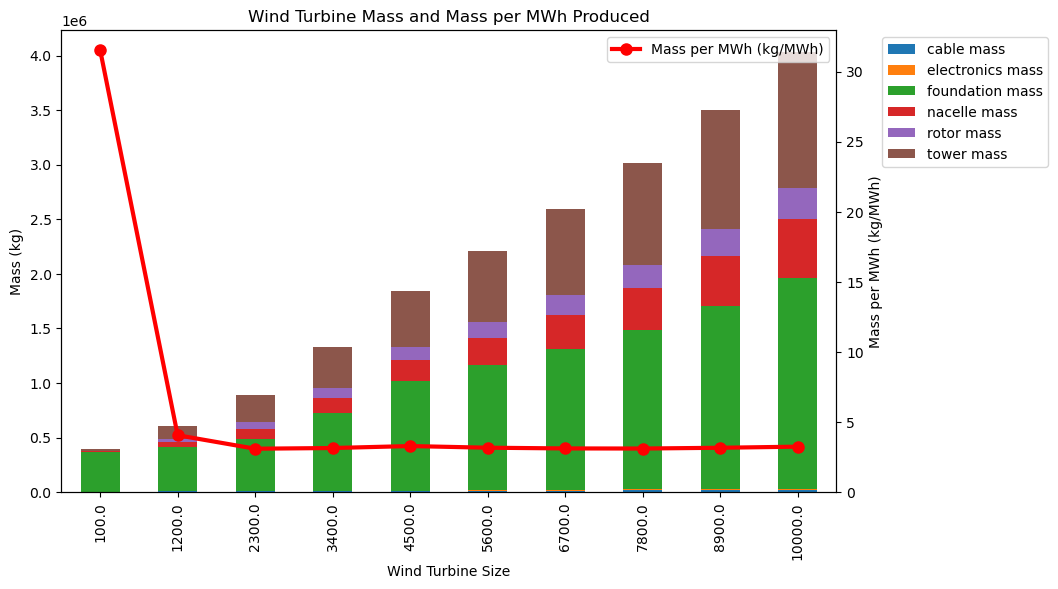

In [14]:
import matplotlib.pyplot as plt

mass_df = wt.array.sel(
    parameter=mass_params,
    value=0,
    year=2020,
    application="offshore"
).to_dataframe("x").unstack()["x"]
total_mass_kg = mass_df.sum(axis=1)  # Total mass in kg

# Extract electricity production data
electricity_production = wt.array.sel(
    parameter="lifetime electricity production",
    year=2020,
    application="offshore",
    value=0
).to_dataframe("x")["x"]

valid_idx = (electricity_production > 0) & (~electricity_production.isna())
mass_per_mwh = (total_mass_kg * 1_000) / electricity_production  # Convert kg to grams, then divide by MWh

# Ensure indices are explicitly aligned
mass_per_mwh = mass_per_mwh.reindex(mass_df.loc[valid_idx].index)

# Create a figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mass parameters as a stacked bar chart
mass_df.loc[valid_idx].plot(kind="bar", stacked=True, ax=ax1, legend=False)

# Set labels for the primary axis
ax1.set_ylabel("Mass (kg)")
ax1.set_xlabel("Wind Turbine Size")
ax1.set_title("Wind Turbine Mass and Mass per MWh Produced")

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot mass per MWh as a line (use mass_per_mwh.index for x-values)
ax2.plot(
    ax1.get_xticks(),  # Properly aligned index
    mass_per_mwh.values,
    color="red",
    marker="o",
    markersize=8,
    linestyle="-",
    linewidth=3,
    label="Mass per MWh (kg/MWh)",
    zorder=5
)

# Set labels for the secondary axis
ax2.set_ylabel("Mass per MWh (kg/MWh)")

# Ensure visibility of secondary axis
ax2.set_ylim(0,)

# Add legends
ax1.legend(mass_df.columns, loc="upper left", bbox_to_anchor=(1.05, 1))
ax2.legend(loc="upper right")

plt.show()


In [ ]:
wt.array.sel(
    parameter=mass_params,
    application="onshore",
    year=2020,
    value=0
).sum(dim="parameter").to_dataframe("x").reset_index()